In [ ]:
import pandas as pd
import numpy as np
import pandas
import numpy
import math
import warnings
import time
import matplotlib.pyplot as plt

from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import roc_curve, auc, accuracy_score,roc_auc_score,mean_absolute_error,r2_score

from scipy import stats
import pickle

warnings.filterwarnings('ignore')

In [ ]:
import h5py as h5
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Embedding, Dropout, Activation, Reshape
#from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [ ]:
dataset = pd.read_csv('sample_data/data_CKD_bigdata_refined.csv')
print(dataset.shape)
df = dataset.dropna()
print(df.shape)
df.describe()


(1000000, 29)
(1000000, 29)


,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
count,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.469590,52.635205,33.694584,162.22823,63.268710,81.230185,0.980466,0.978019,1.031707,1.030689,...,0.862169,25.994604,25.750859,37.184051,1.607675,0.499248,0.400523,23.914610,92.440625,1.566124
std,0.499075,14.205915,12.672969,9.28462,12.520732,11.837045,0.608758,0.607068,0.175200,0.172455,...,0.498426,23.587013,26.335240,50.623388,0.818417,0.499898,0.490005,3.516791,31.420343,0.580398
min,1.000000,25.000000,11.000000,130.00000,25.000000,8.000000,0.100000,0.100000,0.958226,0.956816,...,0.100000,-1.716939,1.000000,1.000000,0.813515,-0.113279,0.000000,12.486993,0.317448,1.000000
25%,1.000000,40.000000,27.000000,155.00000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,...,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000,0.000000,21.484375,77.123612,1.000000
50%,1.000000,50.000000,41.000000,160.00000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,...,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000,0.000000,23.875115,89.324053,2.000000
75%,2.000000,65.000000,43.000000,170.00000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,...,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000,1.000000,25.951557,103.940178,2.000000
max,2.000000,90.000000,50.000000,190.00000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,...,98.000000,9999.000000,7210.000000,999.000000,3.000000,1.432356,1.000000,45.714286,1353.095368,5.000000


In [ ]:
# dataset = dataset.head()
# dataset

In [ ]:
dataset.shape

(1000000, 29)

In [ ]:
dataset.isnull().sum()

sex                      0
age                      0
sido                     0
height                   0
weight                   0
waist                    0
vision_left              0
vision_right             0
listen_left              0
listen_right             0
BP_HIGH                  0
BP_LWST                  0
BLDS                     0
TOT_CHOLE                0
TRIGLYCERIDE             0
HDL_CHOLE                0
LDL_CHOLE                0
HMG                      0
OLIG_PROTE_CD            0
CREATININE               0
SGOT_AST                 0
SGPT_ALT                 0
GAMMA_GTP                0
SMK_STAT_TYPE_RSPS_CD    0
DRINK_OR_NOT             0
MOUTH_CHECK              0
BMI                      0
GFR                      0
stage                    0
dtype: int64

In [ ]:
# dataset = dataset[dataset[ 'CREATININE ']<=15]


In [ ]:
dataset

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1,40,43,170,75,90.0,1.0,1.0,1.0,1.0,...,1.0,21.0,35.0,40.0,1.0,1.0,1,25.951557,86.886038,2
1,1,35,11,180,80,89.0,0.9,1.2,1.0,1.0,...,0.9,20.0,36.0,27.0,3.0,0.0,1,24.691358,100.644197,1
2,1,45,41,165,75,91.0,1.2,1.5,1.0,1.0,...,0.9,47.0,32.0,68.0,1.0,0.0,0,27.548209,95.928640,1
3,1,55,48,175,80,91.0,1.5,1.2,1.0,1.0,...,1.1,29.0,34.0,18.0,1.0,0.0,1,26.122449,73.203730,2
4,1,55,30,165,60,80.0,1.0,1.2,1.0,1.0,...,0.8,19.0,12.0,25.0,1.0,0.0,1,22.038567,105.714492,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,50,48,175,80,92.1,1.5,1.5,1.0,1.0,...,1.0,26.0,36.0,27.0,1.0,0.0,0,26.122449,83.237802,2
999996,1,40,41,170,75,86.0,1.0,1.5,1.0,1.0,...,1.1,14.0,17.0,15.0,1.0,0.0,0,25.951557,77.836416,2
999997,2,45,26,155,50,68.0,1.0,0.7,1.0,1.0,...,0.8,30.0,27.0,17.0,3.0,1.0,0,20.811655,81.542158,2
999998,1,30,29,175,60,72.0,1.5,1.0,1.0,1.0,...,0.8,21.0,14.0,17.0,1.0,0.0,0,19.591837,118.695643,1


In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import keras.layers
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn import metrics
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from collections import Counter
#Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values



In [ ]:
from imblearn.over_sampling import SMOTE
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_sm, y_sm = smt.fit_resample(X, y)

counter = Counter(y_sm)
print('After',counter)

Before Counter({2: 486184, 1: 475386, 3: 36377, 5: 1027, 4: 1026})
After Counter({2: 486184, 1: 486184, 3: 486184, 5: 486184, 4: 486184})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state = 2)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train )
y_train_hat = xg_reg.predict(X_train)
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_hat)
train_rmse = np.sqrt(mean_squared_error(y_train , y_train_hat))
print ('R2: ',train_r2)
print ('RMSE: ', train_rmse)

[13:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2:  0.9903690693075328
RMSE:  0.13879932704586062


In [ ]:
# from imblearn.combine import SMOTEENN
# counter = Counter(y)
# print('Before',counter)
# # oversampling the train dataset using SMOTE + ENN
# smenn = SMOTEENN()
# X_smenn, y_smenn = smenn.fit_resample(X,y)
# counter = Counter(y_smenn)
# print('After',counter)

In [ ]:
#X_train,X_test,y_train,y_test=train_test_split(X_smenn, y_smenn, train_size=0.8, stratify = y_smenn, random_state=100)

In [ ]:
print(X_train.shape,y_train.shape)
y_train = to_categorical(y_train,dtype="uint8")
print(y_train.shape)
y_test = to_categorical(y_test,dtype ="uint8")
print(y_test.shape)


(1944736, 28) (1944736,)
(1944736, 6)
(486184, 6)


In [ ]:
# # ### ANN only
# import time
# start_time = time.time()
# #build the model
# # sequential
# #3 layers firtst 2 nurons and relu function
# #output layer 10 nuron softmax function
# model = Sequential()
# model.add(keras.layers.Dense (128,input_shape=(X_train.shape[1],),activation='relu')) #input layer
# model.add(keras.layers.Dense (64,activation='relu')) #hidden
# model.add(Dropout(.3))
# model.add(keras.layers.Dense (32,activation='relu')) #hidden
# model.add(Dropout(.3))
# model.add(keras.layers.Dense (5,activation='sigmoid')) #output
# model.compile(
#     optimizer = Adam(lr=0.001),
#     loss = 'mse',
#     metrics = ['accuracy']
# )
# history = model.fit(X_train, y_train, epochs=200,batch_size = 2096, validation_data=(X_test, y_test))
# print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_classes_1=y_test.argmax(axis=-1)
mat = confusion_matrix(y_classes_1,y_classes)
print(mat)
pl= ConfusionMatrixDisplay(mat,display_labels=range(5))
# pl.plot()
# plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(precision_score(y_classes_1,y_classes,average='micro'))
print(recall_score(y_classes_1,y_classes,average="micro"))
print(f1_score(y_classes_1,y_classes,average="micro"))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_classes_1,y_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']))

In [ ]:
target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']

In [ ]:
import seaborn as sn
import pandas as pd 
fig = plt.subplots(1,1, figsize = (10, 6))
target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']
df_cm = pd.DataFrame(mat,target_names,target_names)
sn.set(font_scale= 2)
sn.heatmap(df_cm,annot=True,annot_kws={"size":10},cmap='Blues',fmt='g')
plt.xlabel('Predictions',fontsize=22)
plt.ylabel('Actual',fontsize=22)
plt.xticks(fontsize =16)
plt.yticks(fontsize =16)
plt.savefig('ANN_ConfusionMatrix.png', dpi=300)
# from mlxtend.plotting import plot_confusion_matrix
# fig,ax = plot_confusion_matrix(conf_mat = mat,fontsize=20)
# plt.xlabel('Predictions',fontsize=18)
# plt.ylabel('Actual',fontsize=18)

In [ ]:
from google.colab import files
files.download('ANN_ConfusionMatrix.png')

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.style.use('seaborn-white')
#fig = plt.subplots(1,1, figsize = (12, 8))
fig.set_size_inches(11,8, forward=True)
# fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('ANN',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.draw()
plt.savefig('ANN.png', dpi=300)

In [ ]:
from google.colab import files
files.download('ANN.png') 

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
#plt.style.use('seaborn-white')

target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_classes_1)
    y_test = lb.transform(y_classes_1)
    y_pred = lb.transform(y_classes)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
c_ax.legend(fontsize=18,)
#c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize = 22)
c_ax.set_ylabel('True Positive Rate',fontsize = 22)
plt.title('ANN',fontsize = 24)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.savefig('ANN_AUC.png', dpi=300)
plt.show()

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train.shape)
print(X_test.shape)

(1944736, 28, 1)
(486184, 28, 1)


In [ ]:
# # get the model SimpleRNN
from keras.layers import Dense, SimpleRNN
def evaluate_model_SimpleRNN(X_train, X_val, y_train, y_val):
  model = SimpleRNN
  timesteps=125
  dims=4
  model = Sequential()
  model.add(SimpleRNN(units=16, input_shape=(X_train.shape[1],1), activation="relu"))
  model.add(Dense(256, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(6, kernel_initializer='he_uniform'))
  model.compile(loss='mse', optimizer=Adam(lr = 0.001), metrics=['accuracy'])
  history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=200, batch_size=5096, verbose=1)
  return history, model
  

Epoch 1/200
382/382 [==============================] - 18s 44ms/step - loss: 0.0413 - accuracy: 0.8560 - val_loss: 0.0098 - val_accuracy: 0.9781
Epoch 2/200
382/382 [==============================] - 16s 43ms/step - loss: 0.0080 - accuracy: 0.9786 - val_loss: 0.0062 - val_accuracy: 0.9840
Epoch 3/200
382/382 [==============================] - 16s 43ms/step - loss: 0.0058 - accuracy: 0.9833 - val_loss: 0.0048 - val_accuracy: 0.9875
Epoch 4/200
382/382 [==============================] - 16s 43ms/step - loss: 0.0047 - accuracy: 0.9856 - val_loss: 0.0039 - val_accuracy: 0.9891
Epoch 5/200
382/382 [==============================] - 17s 43ms/step - loss: 0.0041 - accuracy: 0.9872 - val_loss: 0.0035 - val_accuracy: 0.9885
Epoch 6/200
382/382 [==============================] - 16s 43ms/step - loss: 0.0037 - accuracy: 0.9883 - val_loss: 0.0034 - val_accuracy: 0.9892
Epoch 7/200
382/382 [==============================] - 17s 44ms/step - loss: 0.0035 - accuracy: 0.9883 - val_loss: 0.0029 - val_ac

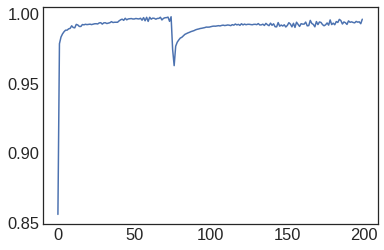

In [ ]:
n_folds = 1
cv_scores, model_history = list(), list()
model = tf.keras.Sequential()
history, model= evaluate_model_SimpleRNN(X_train, X_test, y_train, y_test)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[[ 1.4771521e-04  2.8623194e-03  7.7128410e-05  9.9509650e-01
   8.0989003e-03 -5.9067011e-03]
 [-5.0396472e-04  2.4400800e-03  1.5562773e-03  9.9486679e-01
   4.9992576e-03 -6.8657994e-03]
 [ 2.4615452e-03  1.0426130e+00 -1.8543124e-02 -2.0844288e-02
   4.1000620e-03 -2.0266309e-02]
 ...
 [ 3.6307499e-03  9.8978972e-01  1.1528432e-03 -6.1656311e-03
  -6.1736628e-03  1.9217983e-02]
 [ 3.0088052e-04 -4.9449503e-04  5.8054924e-04  9.9648041e-01
   5.6741387e-03 -4.7907233e-03]
 [-1.8057823e-03  4.1466802e-03  1.0874271e-03  9.9662197e-01
   6.4687878e-03 -8.1257224e-03]]
[3 3 1 ... 1 3 3]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_classes_1=y_test.argmax(axis=-1)
mat = confusion_matrix(y_classes_1,y_classes)
print(mat)
pl= ConfusionMatrixDisplay(mat,display_labels=range(5))

[[97077     9     0     0   170]
 [   19 97233     4     0    17]
 [    0     7 97307    39     0]
 [    0     0     0 97273     1]
 [  941   692    45    58 95292]]


In [ ]:
import pandas as pd
FP = mat.sum(axis=0) - np.diag(mat) 
FN = mat.sum(axis=1) - np.diag(mat)
TP = np.diag(mat)
TN = mat.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
# print(TP)
# print(TN)
# print(FP)
# print(FN)
print(TPR)
print(FPR)
print(FNR)

[0.9981595  0.99958879 0.99952749 0.99998972 0.98210826]
[0.00246832 0.00182047 0.00012602 0.00024942 0.0004831 ]
[1.84050341e-03 4.11213800e-04 4.72507267e-04 1.02802393e-05
 1.78917426e-02]


In [ ]:
table = pd.DataFrame({'TPR':TPR,'FPR':FPR,'FNR':FNR,'ACCURACY':ACC},index = ['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5'])
table.round(3)

,TPR,FPR,FNR,ACCURACY
Stage 1,0.998,0.002,0.002,0.998
Stage 2,1.000,0.002,0.000,0.998
Stage 3,1.000,0.000,0.000,1.000
Stage 4,1.000,0.000,0.000,1.000
Stage 5,0.982,0.000,0.018,0.996


In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))


Accuracy: 1.00



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(precision_score(y_classes_1,y_classes,average='micro'))
print(recall_score(y_classes_1,y_classes,average="micro"))
print(f1_score(y_classes_1,y_classes,average="micro"))

0.9958822174320833
0.9958822174320833
0.9958822174320833


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_classes_1,y_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']))


Classification Report

              precision    recall  f1-score   support

     Stage 1       0.99      1.00      0.99     97256
     Stage 2       0.99      1.00      1.00     97273
     Stage 3       1.00      1.00      1.00     97353
     Stage 4       1.00      1.00      1.00     97274
     Stage 5       1.00      0.98      0.99     97028

    accuracy                           1.00    486184
   macro avg       1.00      1.00      1.00    486184
weighted avg       1.00      1.00      1.00    486184



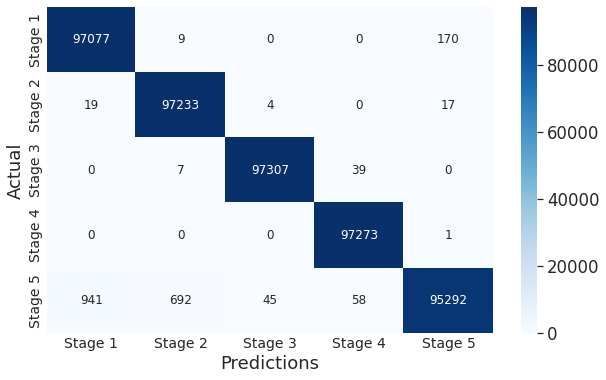

In [ ]:
import seaborn as sn
import pandas as pd 
fig = plt.subplots(1,1, figsize = (10, 6))
target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']
df_cm = pd.DataFrame(mat,target_names,target_names)
sn.set(font_scale= 1.5)
sn.heatmap(df_cm,annot=True,annot_kws={"size":12},cmap='Blues',fmt='g')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actual',fontsize=18)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.savefig('RNN-MLP_ConfusionMatrix.png', dpi=100)


In [ ]:
from google.colab import files
files.download('RNN-MLP_ConfusionMatrix.png') 

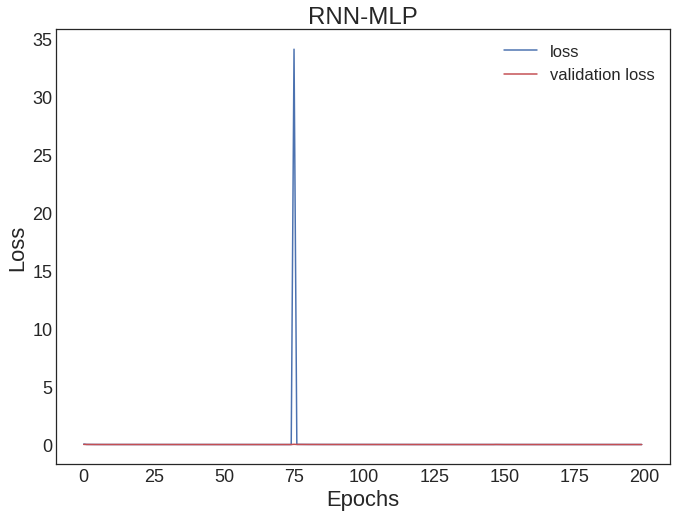

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.style.use('seaborn-white')
#fig = plt.subplots(1,1, figsize = (12, 8))
fig.set_size_inches(11,8, forward=True)
# fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('RNN-MLP',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.draw()
plt.savefig('RNN-MLP.png', dpi=300)

In [ ]:
from google.colab import files
files.download('RNN-MLP.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ROC AUC score: 0.9974226431038264


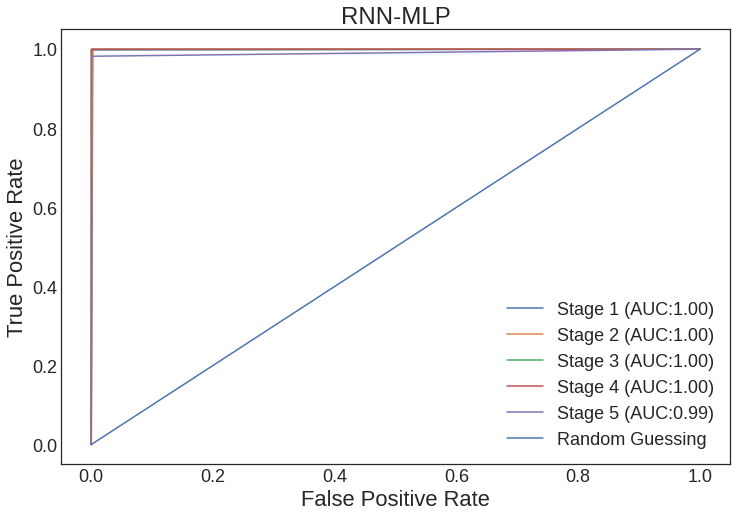

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
#plt.style.use('seaborn-white')

target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_classes_1)
    y_test = lb.transform(y_classes_1)
    y_pred = lb.transform(y_classes)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
c_ax.legend(fontsize=18,)
#c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize = 22)
c_ax.set_ylabel('True Positive Rate',fontsize = 22)
plt.title('RNN-MLP',fontsize = 24)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.savefig('RNN-MLP_AUC.png', dpi=300)
plt.show()

In [ ]:
from google.colab import files
files.download('RNN-MLP_AUC.png') 

In [ ]:
# SimpleRNN model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dense, SimpleRNN
import time
start_time = time.time()
model = Sequential()
model.add(SimpleRNN(units=4, input_shape=(X_train.shape[1],1), activation="relu"))
model.add(Dense(4, activation="relu")) 
model.add(Dense(6))
model.compile(
    optimizer = Adam(lr=0.001),
    loss = 'mse',
    metrics = ['accuracy']
)
history = model.fit(X_train, y_train, epochs=200,batch_size = 5096, validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))


Epoch 1/200
382/382 [==============================] - 10s 22ms/step - loss: 0.1395 - accuracy: 0.2071 - val_loss: 0.1318 - val_accuracy: 0.2360
Epoch 2/200
382/382 [==============================] - 8s 22ms/step - loss: 0.1245 - accuracy: 0.3442 - val_loss: 0.1138 - val_accuracy: 0.4012
Epoch 3/200
382/382 [==============================] - 8s 22ms/step - loss: 0.1088 - accuracy: 0.4622 - val_loss: 0.1067 - val_accuracy: 0.4274
Epoch 4/200
382/382 [==============================] - 9s 22ms/step - loss: 0.1063 - accuracy: 0.4443 - val_loss: 0.1055 - val_accuracy: 0.4820
Epoch 5/200
382/382 [==============================] - 8s 21ms/step - loss: 0.1041 - accuracy: 0.5343 - val_loss: 0.1020 - val_accuracy: 0.5715
Epoch 6/200
382/382 [==============================] - 8s 22ms/step - loss: 0.0999 - accuracy: 0.5786 - val_loss: 0.0970 - val_accuracy: 0.5826
Epoch 7/200
382/382 [==============================] - 8s 20ms/step - loss: 0.0945 - accuracy: 0.5874 - val_loss: 0.0915 - val_accuracy

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[[-2.0115350e-07  8.2304500e-02  3.5235348e-01  5.3850377e-01
   8.4169451e-03  1.4261007e-02]
 [-2.0098672e-07  8.1695125e-02  3.5173190e-01  5.3788811e-01
   8.4177796e-03  1.6110539e-02]
 [-5.0352742e-07  1.2853036e+00  2.3283313e-01 -5.4416972e-01
  -6.6950382e-03  1.9488871e-02]
 ...
 [-3.0874710e-07  5.1028252e-01  3.1092331e-01  1.5519327e-01
   3.0538975e-03  1.3158083e-02]
 [-2.0302497e-07  8.9739941e-02  3.5174963e-01  5.3204197e-01
   8.3252732e-03  1.3926566e-02]
 [-1.9872699e-07  7.2643459e-02  3.5339722e-01  5.4734164e-01
   8.5388962e-03  1.3991356e-02]]
[3 3 1 ... 1 3 3]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_classes_1=y_test.argmax(axis=-1)
mat = confusion_matrix(y_classes_1,y_classes)
print(mat)
pl= ConfusionMatrixDisplay(mat,display_labels=range(5))

[[97256     0     0     0     0]
 [35580  4606 57087     0     0]
 [    0     0 96045  1308     0]
 [    0     0     0 97156   118]
 [ 3458   147   473    33 92917]]


In [ ]:
import pandas as pd
FP = mat.sum(axis=0) - np.diag(mat) 
FN = mat.sum(axis=1) - np.diag(mat)
TP = np.diag(mat)
TN = mat.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
# print(TP)
# print(TN)
# print(FP)
# print(FN)
print(TPR)
print(FPR)
print(ACC)


[1.         0.04735127 0.98656436 0.99878693 0.95763079]
[0.10037333 0.00037798 0.14803346 0.0034481  0.00030322]
[0.9197053  0.80909697 0.87891827 0.99699908 0.99130165]


In [ ]:
table = pd.DataFrame({'TPR':TPR,'FPR':FPR,'FNR':FNR,'ACCURACY':ACC},index = ['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5'])
table.round(3)

,TPR,FPR,FNR,ACCURACY
Stage 1,1.000,0.100,0.000,0.920
Stage 2,0.047,0.000,0.953,0.809
Stage 3,0.987,0.148,0.013,0.879
Stage 4,0.999,0.003,0.001,0.997
Stage 5,0.958,0.000,0.042,0.991


In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))


Accuracy: 0.80



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(precision_score(y_classes_1,y_classes,average='micro'))
print(recall_score(y_classes_1,y_classes,average="micro"))
print(f1_score(y_classes_1,y_classes,average="micro"))

0.798010629720435
0.798010629720435
0.7980106297204349


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_classes_1,y_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']))


Classification Report

              precision    recall  f1-score   support

     Stage 1       0.71      1.00      0.83     97256
     Stage 2       0.97      0.05      0.09     97273
     Stage 3       0.63      0.99      0.77     97353
     Stage 4       0.99      1.00      0.99     97274
     Stage 5       1.00      0.96      0.98     97028

    accuracy                           0.80    486184
   macro avg       0.86      0.80      0.73    486184
weighted avg       0.86      0.80      0.73    486184



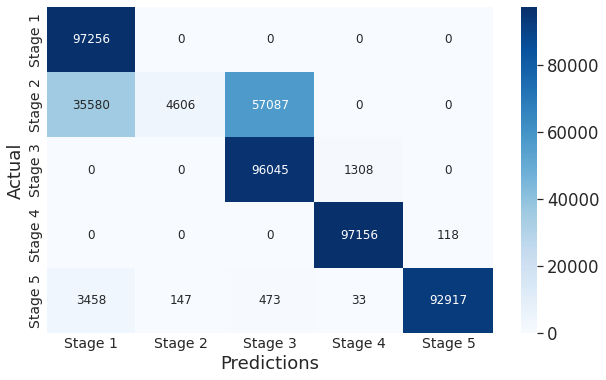

In [ ]:
import seaborn as sn
import pandas as pd 
fig = plt.subplots(1,1, figsize = (10, 6))
target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']
df_cm = pd.DataFrame(mat,target_names,target_names)
sn.set(font_scale= 1.5)
sn.heatmap(df_cm,annot=True,annot_kws={"size":12},cmap='Blues',fmt='g')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actual',fontsize=18)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.savefig('RNN_ConfusionMatrix.png', dpi=100)

In [ ]:
from google.colab import files
files.download('RNN_ConfusionMatrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

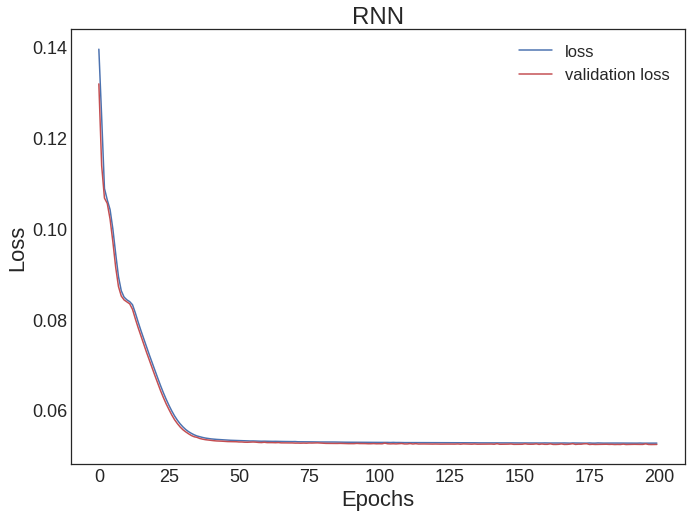

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.style.use('seaborn-white')
#fig = plt.subplots(1,1, figsize = (12, 8))
fig.set_size_inches(11,8, forward=True)
# fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('RNN',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.draw()
plt.savefig('RNN.png', dpi=300)

In [ ]:
from google.colab import files
files.download('RNN.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ROC AUC score: 0.8737797250793818


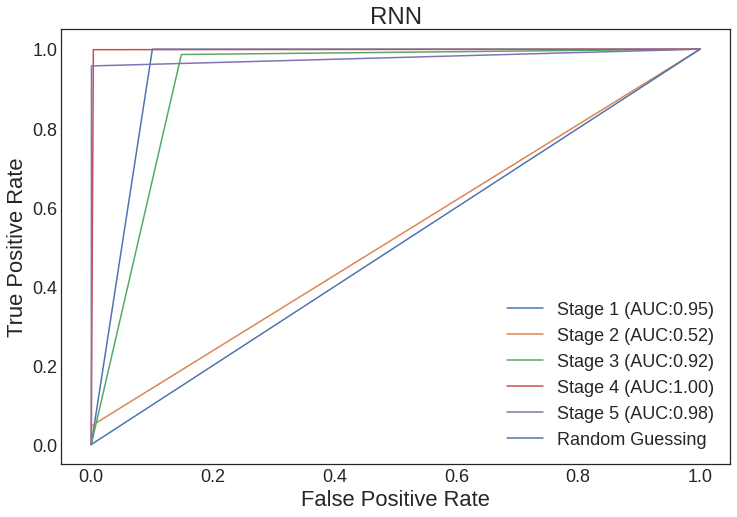

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
#plt.style.use('seaborn-white')

target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_classes_1)
    y_test = lb.transform(y_classes_1)
    y_pred = lb.transform(y_classes)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
c_ax.legend(fontsize=18,)
#c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize = 22)
c_ax.set_ylabel('True Positive Rate',fontsize = 22)
plt.title('RNN',fontsize = 24)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.savefig('RNN_AUC.png', dpi=300)
plt.show()

In [ ]:
from google.colab import files
files.download('RNN_AUC.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
 #MLP only
import time
start_time = time.time()
model = keras.models.Sequential()
model.add(keras.layers.BatchNormalization(input_shape=tuple([X_train.shape[1]])))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(4, activation='relu'))
# model.add(keras.layers.Dense(4, activation='relu'))
# model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(6, activation='relu'))

model.compile(
    optimizer = Adam(lr=0.001),
    loss = 'mse',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs=200,batch_size = 2048, validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/200
950/950 [==============================] - 7s 6ms/step - loss: 0.1034 - accuracy: 0.5619 - val_loss: 0.0604 - val_accuracy: 0.7630
Epoch 2/200
950/950 [==============================] - 5s 5ms/step - loss: 0.0558 - accuracy: 0.7415 - val_loss: 0.0424 - val_accuracy: 0.7852
Epoch 3/200
950/950 [==============================] - 5s 6ms/step - loss: 0.0493 - accuracy: 0.7531 - val_loss: 0.0416 - val_accuracy: 0.7820
Epoch 4/200
950/950 [==============================] - 5s 5ms/step - loss: 0.0475 - accuracy: 0.7573 - val_loss: 0.0405 - val_accuracy: 0.7842
Epoch 5/200
950/950 [==============================] - 5s 5ms/step - loss: 0.0465 - accuracy: 0.7594 - val_loss: 0.0402 - val_accuracy: 0.7821
Epoch 6/200
950/950 [==============================] - 5s 5ms/step - loss: 0.0461 - accuracy: 0.7606 - val_loss: 0.0394 - val_accuracy: 0.7874
Epoch 7/200
950/950 [==============================] - 5s 5ms/step - loss: 0.0455 - accuracy: 0.7621 - val_loss: 0.0397 - val_accuracy: 0.7850

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[[0.        0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.       ]
 [0.        1.0805168 0.        0.        0.        0.       ]
 ...
 [0.        0.959693  0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.       ]]
[0 0 1 ... 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_classes_1=y_test.argmax(axis=-1)
mat = confusion_matrix(y_classes_1,y_classes)
print(mat)
pl= ConfusionMatrixDisplay(mat,display_labels=range(5))

[[    0     0     0     0     0     0]
 [    0 97235    21     0     0     0]
 [    0   422 96851     0     0     0]
 [94450     0  1909     0   994     0]
 [    0     0     0     0 97274     0]
 [    0  2367  1642     0   521 92498]]


In [ ]:
import pandas as pd
FP = mat.sum(axis=0) - np.diag(mat) 
FN = mat.sum(axis=1) - np.diag(mat)
TP = np.diag(mat)
TN = mat.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
# print(TP)
# print(TN)
# print(FP)
# print(FN)
print(TPR)
print(FPR)
print(FNR)

[       nan 0.99978408 0.99566169 0.         1.         0.95331245]
[0.19426801 0.00717099 0.00918462 0.         0.0038955  0.        ]
[           nan 2.15924981e-04 4.33830559e-03 1.00000000e+00
 0.00000000e+00 4.66875541e-02]


In [ ]:
table = pd.DataFrame({'TPR':TPR,'FPR':FPR,'FNR':FNR,'ACCURACY':ACC},index = ['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5'])
table.round(3)

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(precision_score(y_classes_1,y_classes,average='micro'))
print(recall_score(y_classes_1,y_classes,average="micro"))
print(f1_score(y_classes_1,y_classes,average="micro"))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_classes_1,y_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']))

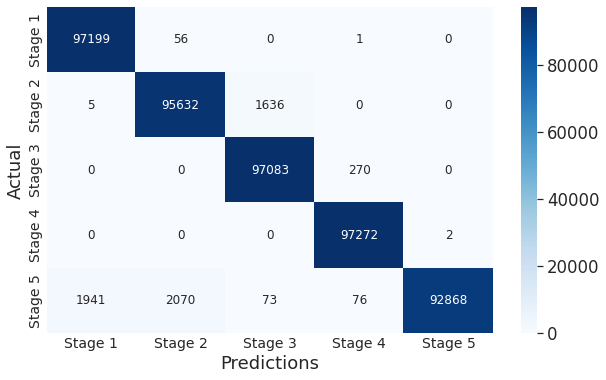

In [ ]:
import seaborn as sn
import pandas as pd 
fig = plt.subplots(1,1, figsize = (10, 6))
target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']
df_cm = pd.DataFrame(mat,target_names,target_names)
sn.set(font_scale= 1.5)
sn.heatmap(df_cm,annot=True,annot_kws={"size":12},cmap='Blues',fmt='g')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actual',fontsize=18)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.savefig('MLP_ConfusionMatrix.png', dpi=100)

In [ ]:
from google.colab import files
files.download('MLP_ConfusionMatrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

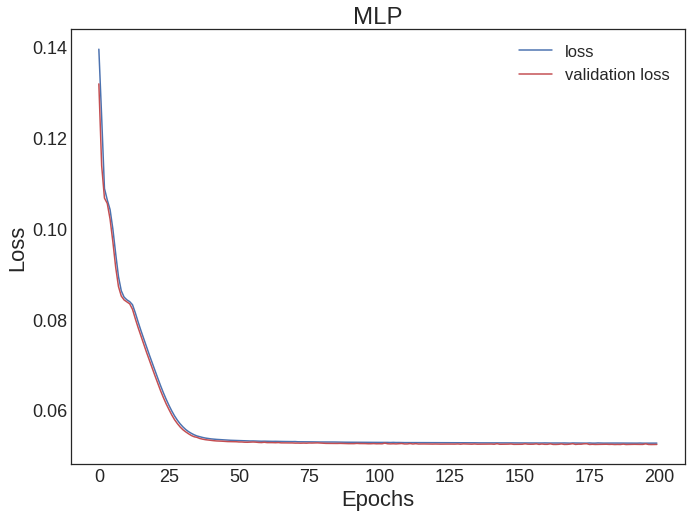

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.style.use('seaborn-white')
#fig = plt.subplots(1,1, figsize = (12, 8))
fig.set_size_inches(11,8, forward=True)
# fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('MLP',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.draw()
plt.savefig('MLP.png', dpi=300)

In [ ]:
from google.colab import files
files.download('MLP.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ROC AUC score: 0.9921113031757531


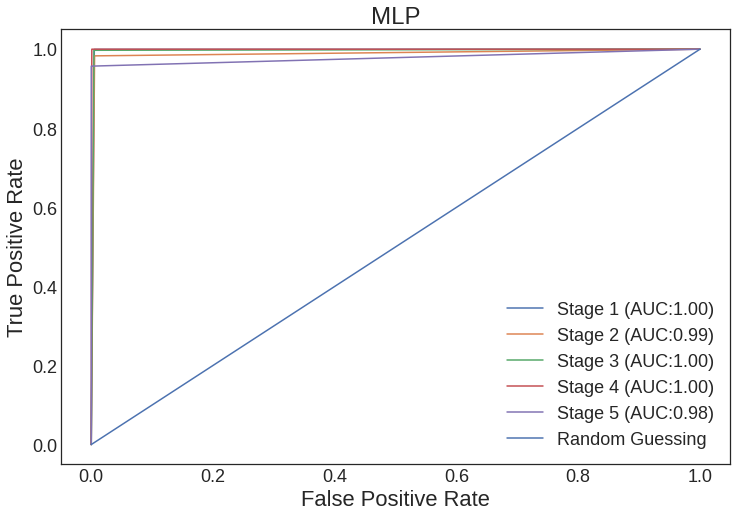

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
#plt.style.use('seaborn-white')

target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_classes_1)
    y_test = lb.transform(y_classes_1)
    y_pred = lb.transform(y_classes)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
c_ax.legend(fontsize=18,)
#c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize = 22)
c_ax.set_ylabel('True Positive Rate',fontsize = 22)
plt.title('MLP',fontsize = 24)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.savefig('MLP_AUC.png', dpi=300)
plt.show()

In [ ]:
from google.colab import files
files.download('MLP_AUC.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>